In [ ]:
import warnings
warnings.simplefilter(action='ignore')#, category=FutureWarning

In [ ]:
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

# Machine Learning algorithms:

Load dataset

In [ ]:
dfCreditCard = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/master ciencia de datos/TFM/creditCard.csv")
dfCreditCard.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0.010101,2,2,1,0.051724,2,2,-1,-1,-2,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0.111111,2,2,2,0.086207,-1,2,0,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0.080808,2,2,2,0.224138,0,0,0,0,0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0.040404,2,2,1,0.275862,0,0,0,0,0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0.040404,1,2,1,0.620690,-1,0,-1,0,0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder(sparse_output=True)

# Encode the categorical variables using one-hot encoding
onehot_sparse = onehot_encoder.fit_transform(dfCreditCard[['X2', 'X3','X4','X6','X7','X8', 'X9','X10','X11']])
# Convert the encoded data to a pandas DataFrame
onehot_df = pd.DataFrame.sparse.from_spmatrix(onehot_sparse, columns=onehot_encoder.get_feature_names_out(['X2', 'X3','X4','X6','X7','X8', 'X9','X10','X11']))

# Concatenate the one-hot encoded data with the original data
dfCreditCard = pd.concat([onehot_df,dfCreditCard], axis=1)

# Drop the original categorical columns
dfCreditCard = dfCreditCard.drop(['X2', 'X3','X4','X6','X7','X8', 'X9','X10','X11'], axis=1)
dfCreditCard.head().T

,0,1,2,3,4
X2_1,0.0,0.000000,0.000000,0.000000,1.000000
X2_2,1.0,1.000000,1.000000,1.000000,0.000000
X3_1,0.0,0.000000,0.000000,0.000000,0.000000
X3_2,1.0,1.000000,1.000000,1.000000,1.000000
X3_3,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
X20,0.0,0.001116,0.001116,0.001339,0.011160
X21,0.0,0.001610,0.001610,0.001771,0.014493
X22,0.0,0.000000,0.002345,0.002506,0.001615
X23,0.0,0.003783,0.009458,0.001892,0.001284


In [ ]:
from sklearn.decomposition import PCA

# Create a PCA object
X_pca = PCA()

# Fit the PCA object to the standardized data
X_pca.fit(dfCreditCard.iloc[:,:-1])

# # Print the PCA components
# print(X_pca.components_)

# # Print the explained variance ratios
# print(X_pca.explained_variance_ratio_)

PCA()

In [ ]:
# Transform the data using PCA
X_pca_transformed = X_pca.transform(dfCreditCard.iloc[:,:-1])

# Create a new DataFrame with the transformed data and the last column of dfCreditCard
dfCC_PCA = pd.concat([pd.DataFrame(X_pca_transformed), dfCreditCard.iloc[:,-1]], axis=1)

# Print the new DataFrame
dfCC_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,Y
0,1.415557,0.276882,1.065499,-0.076789,0.516835,-0.287164,-0.151210,-0.157416,-0.158873,-0.244911,...,-3.288826e-15,-3.230734e-17,-6.026755e-16,7.236161e-16,-9.098402e-18,1.037837e-17,-1.052318e-15,-1.479403e-16,-1.621694e-16,1
1,-0.147642,-0.160390,-0.108257,-0.263312,1.215632,-0.279994,-0.435042,-0.087830,0.885452,-0.989220,...,-2.192220e-15,-2.409612e-16,-5.208181e-16,7.062149e-16,-1.441544e-17,-3.434615e-17,-4.618500e-16,-1.881201e-16,-3.729838e-16,1
2,-1.362347,0.019227,-0.191997,-0.670802,0.431861,-0.598587,-0.067687,-0.016506,-0.045462,0.028296,...,-2.048335e-15,-1.199898e-16,-6.000019e-16,-1.388949e-16,1.283668e-16,-7.653463e-17,4.195756e-17,-1.523097e-16,-4.191639e-18,0
3,-1.297757,0.050954,1.020964,-0.437236,-0.087769,-0.233706,-0.050748,-0.253080,-0.045030,0.035192,...,-2.116837e-15,-1.069744e-16,-6.809767e-16,-9.818092e-17,6.301524e-17,-3.616542e-17,-8.293167e-17,-1.083062e-16,3.529912e-17,0
4,-0.315632,-0.572937,0.679958,0.879286,-0.457165,-0.397572,-0.835925,-0.180435,-0.408068,-0.392687,...,3.393829e-15,-2.547068e-16,-8.834577e-16,2.581038e-16,3.145205e-17,1.534639e-16,-5.584067e-17,1.078671e-16,-8.907762e-18,0


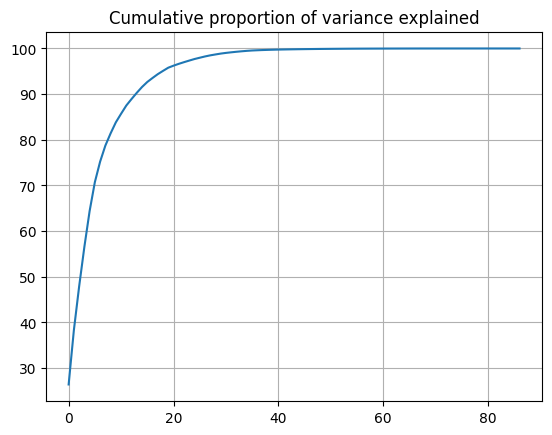

In [ ]:
CPCA = np.cumsum(X_pca.explained_variance_ratio_)*100

plt.plot(CPCA)
plt.title('Cumulative proportion of variance explained')
plt.grid()
plt.show()

In [ ]:
umbral = np.arange(70, 105, 5)
print(umbral)
Npcs = []

for i in umbral:
    Npcs.append(np.argmin(abs(CPCA - i)))

print(Npcs) #total number of principal components

[ 70  75  80  85  90  95 100]
[5, 6, 7, 10, 13, 18, 77]


With 13 variables we can explain the 90% of the data, considerably reducing the number of variables (total of 77)

In [ ]:
dfCC_PCA = pd.concat([dfCC_PCA.iloc[:,:14], dfCC_PCA.iloc[:,-1]], axis=1)
dfCC_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Y
0,1.415557,0.276882,1.065499,-0.076789,0.516835,-0.287164,-0.151210,-0.157416,-0.158873,-0.244911,0.060246,-0.395550,1.162653,1.406374,1
1,-0.147642,-0.160390,-0.108257,-0.263312,1.215632,-0.279994,-0.435042,-0.087830,0.885452,-0.989220,0.023480,-0.089569,0.215029,-0.178780,1
2,-1.362347,0.019227,-0.191997,-0.670802,0.431861,-0.598587,-0.067687,-0.016506,-0.045462,0.028296,0.008826,-0.003797,-0.023293,-0.017363,0
3,-1.297757,0.050954,1.020964,-0.437236,-0.087769,-0.233706,-0.050748,-0.253080,-0.045030,0.035192,0.021860,0.000436,-0.025675,-0.008414,0
4,-0.315632,-0.572937,0.679958,0.879286,-0.457165,-0.397572,-0.835925,-0.180435,-0.408068,-0.392687,0.011523,0.188632,0.096590,-0.173944,0


Train and test splitting

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting train and test 0.75/0.25
X = dfCC_PCA.drop('Y', axis=1)
y = dfCC_PCA['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Techniques to balance the data do not increase the performance of the metrics

In [ ]:
smote = SMOTE(k_neighbors = 4, random_state=1)
X_train, y_train = smote.fit_resample(X_train, y_train)
# ros = RandomOverSampler(random_state=0,shrinkage=0.8)
# # X_train, y_train = ros.fit_resample(X_train, y_train)
# ada = ADASYN(random_state=0, n_neighbors=2)
# X_train, y_train = ada.fit_resample(X_train, y_train)

y = 0

In [ ]:
len(y_train)-sum(y_train)

17496

y = 1

In [ ]:
sum(y_train)

17496

In [ ]:
# Plot confusion matrices
classes = ['Not default payment','Default payment']
def plot_confusionmatrix(y_train_pred,y_train,dom): 
    print(str(dom)+" confusion matrix")
    cf_tree = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf_tree,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Greens', fmt='g')
    plt.tight_layout()
    plt.show()

In [ ]:
# Plot roc curves
def plot_roccurve(y_test,X_test,clf):
    y_score = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score, drop_intermediate=False, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

## Decision tree

In [ ]:
# Imports for decision tree
from sklearn import tree

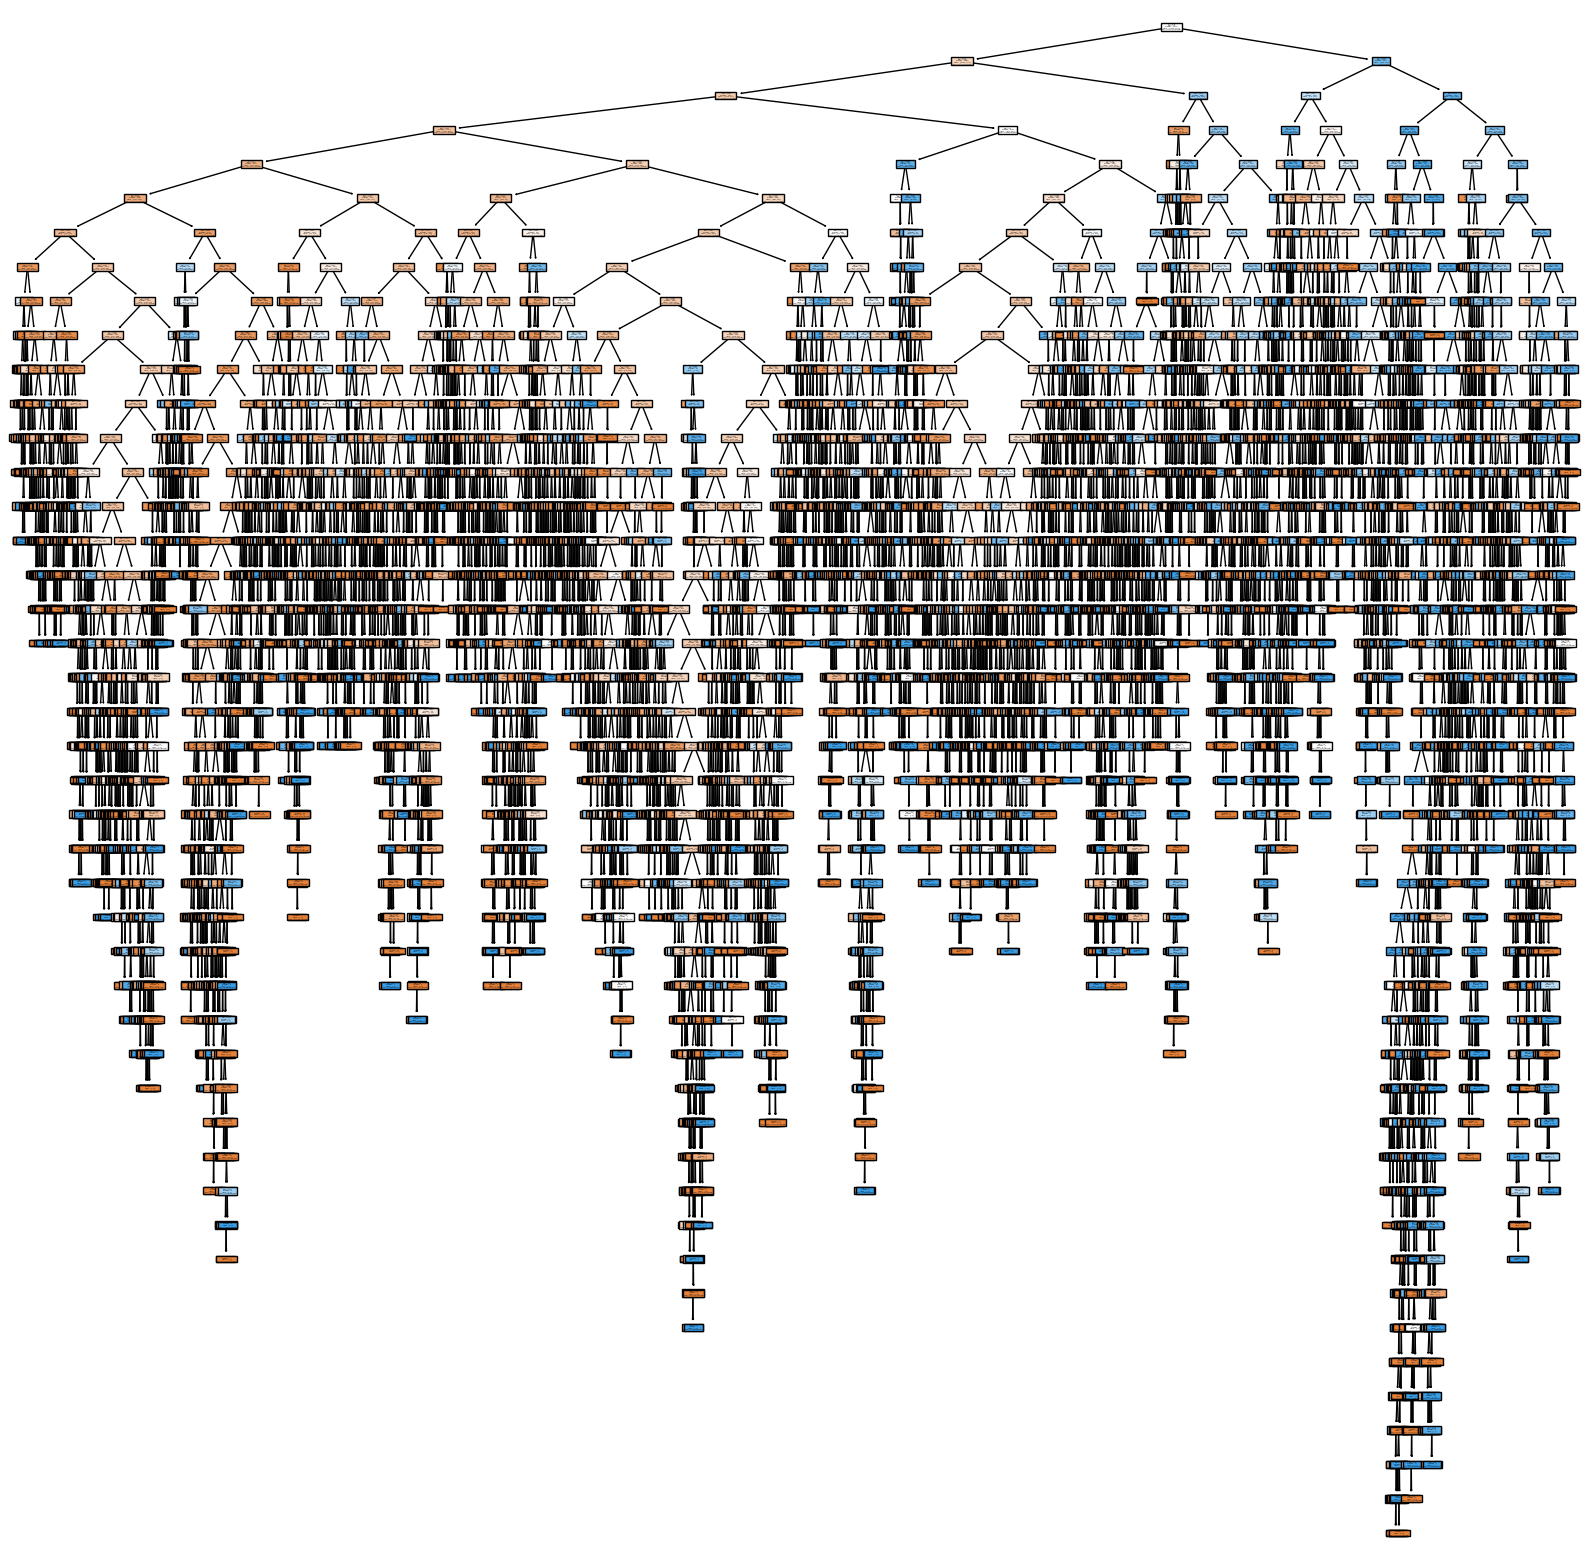

In [ ]:
# Building a complete tree
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train,y_train)
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
# Plotting tree
plt.figure(figsize=(20,20))
features = dfCC_PCA.columns
tree.plot_tree(clf_tree,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
# Calculating train and test score (Overfitting)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.9997999542752629
Test score: 0.6917333333333333


In [ ]:
t0 = time()
print("Fitting the classifier to the training set...")
# 10-fold cv with different parameters
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],#, 9, 10
    'min_samples_split': [2, 3, 4], #2, 3, 4
     'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2']
}
clf_temp = tree.DecisionTreeClassifier(class_weight = 'balanced', random_state=0)
grid_tree = GridSearchCV(estimator=clf_temp,param_grid=params,cv=10)
grid_tree.fit(X_train,y_train)
clf_pruned_tree = grid_tree.best_estimator_
print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid_tree.best_params_)

Fitting the classifier to the training set...
Elapsed time: 807.908s
Best estimator found by grid search:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


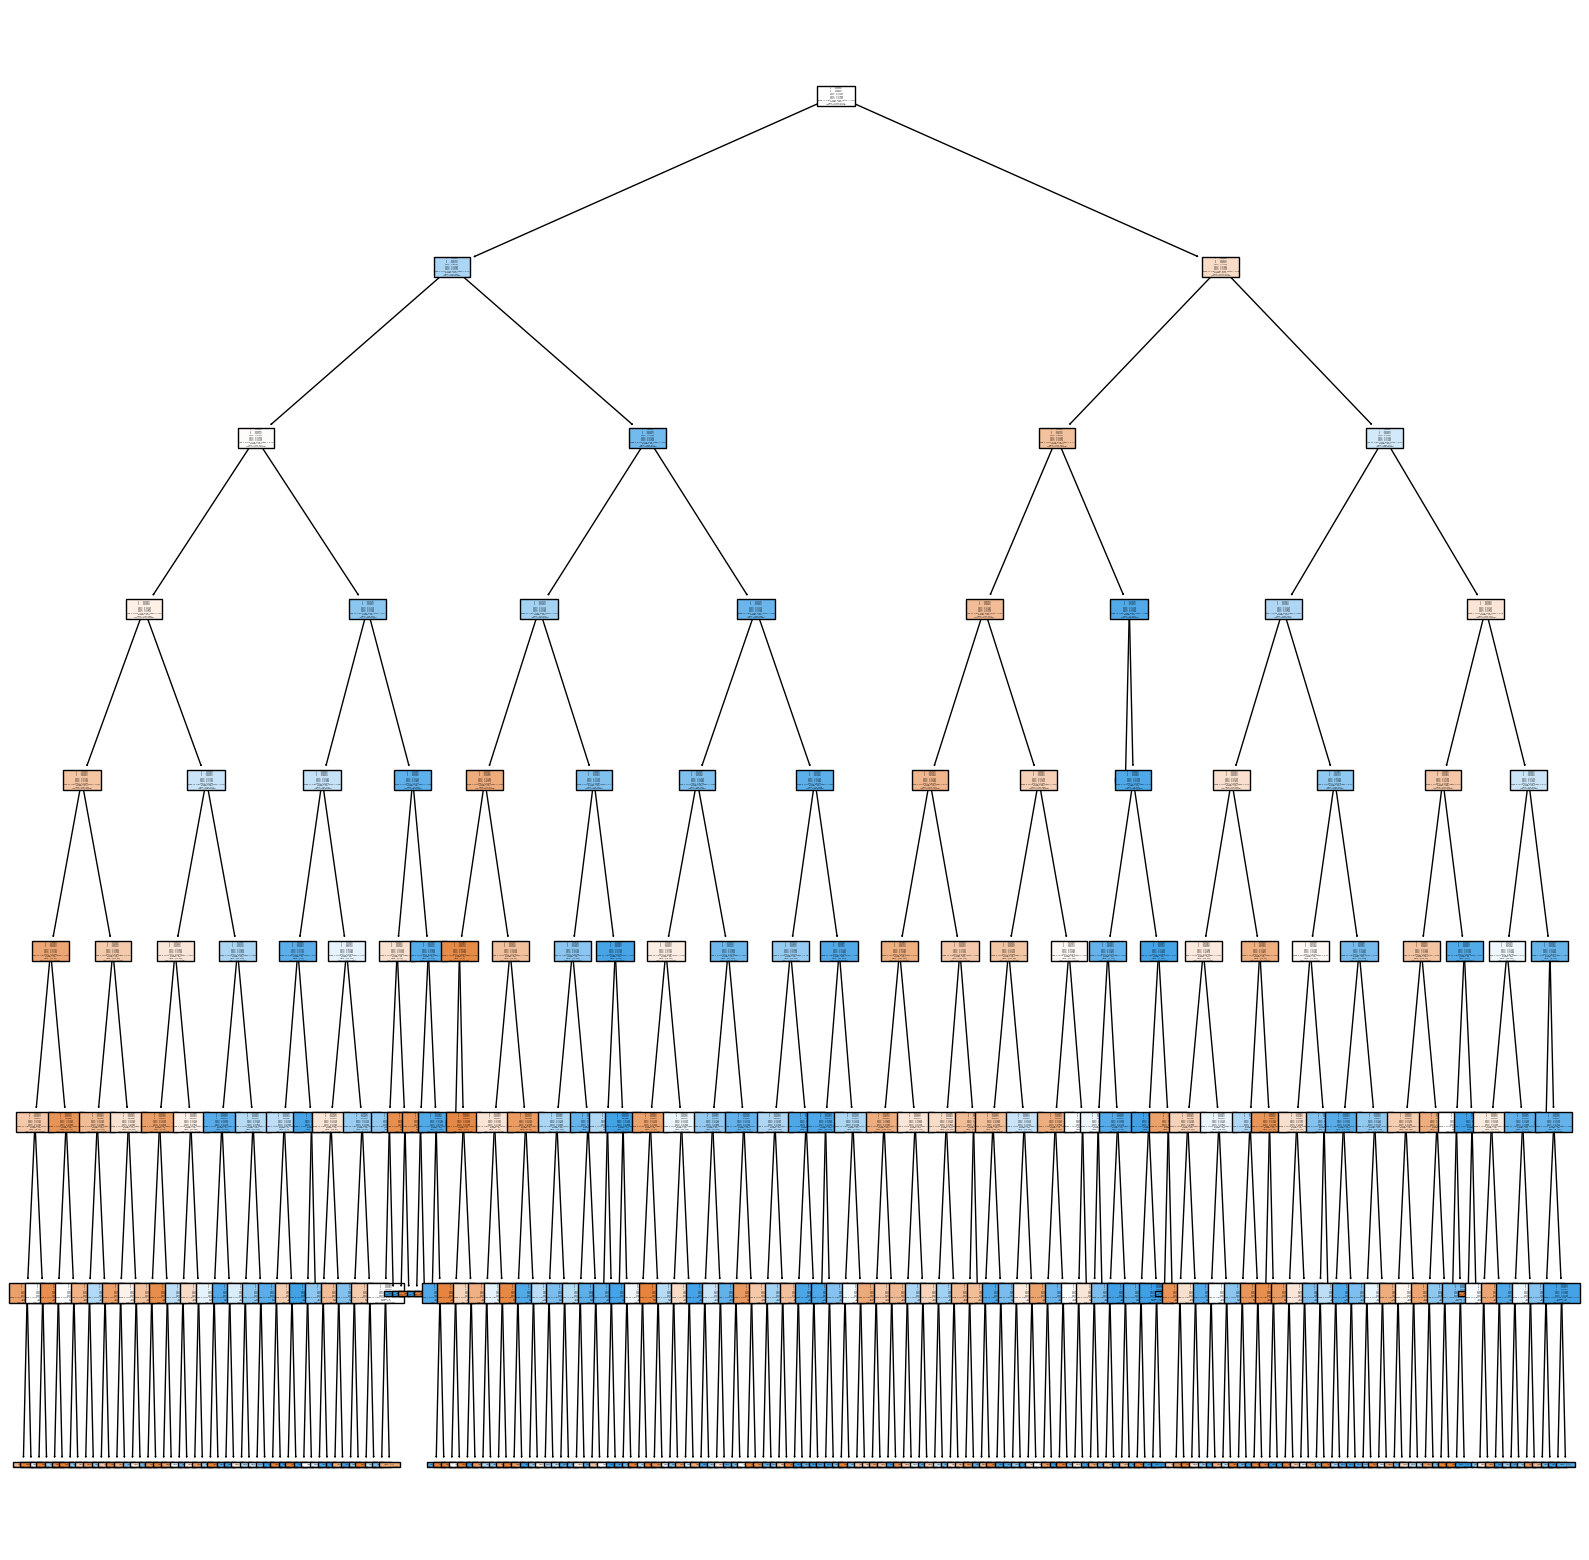

In [ ]:
# Plotting pruned tree
plt.figure(figsize=(20,20))
features = dfCC_PCA
tree.plot_tree(clf_pruned_tree,feature_names=features, class_names=classes,filled=True, impurity=False)
plt.show()

In [ ]:
#Fitting with the best parameters
clf_pruned_tree.fit(X_train,y_train)
#Predicting
y_train_pred = clf_pruned_tree.predict(X_train)
y_test_pred = clf_pruned_tree.predict(X_test)

print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.7253943758573388
Test score: 0.7513333333333333


Train confusion matrix


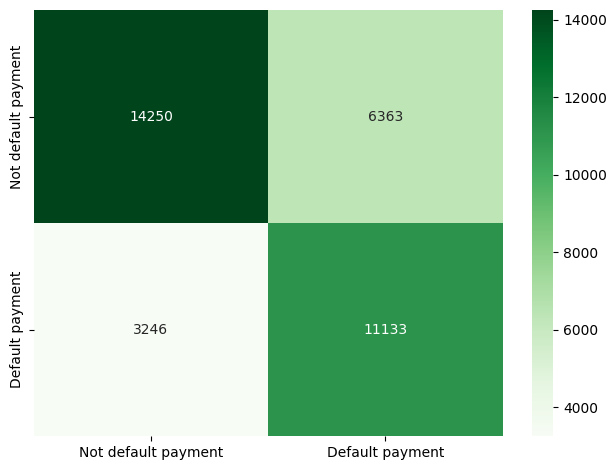

Test confusion matrix


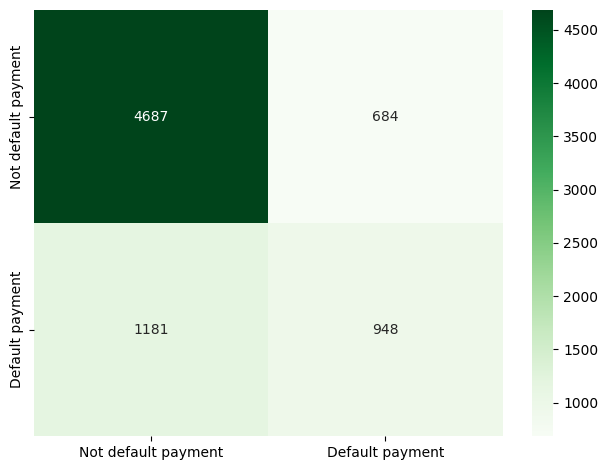

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
                     precision    recall  f1-score   support

Not default payment       0.69      0.81      0.75     17496
    Default payment       0.77      0.64      0.70     17496

           accuracy                           0.73     34992
          macro avg       0.73      0.73      0.72     34992
       weighted avg       0.73      0.73      0.72     34992

Test classification report
                     precision    recall  f1-score   support

Not default payment       0.87      0.80      0.83      5868
    Default payment       0.45      0.58      0.50      1632

           accuracy                           0.75      7500
          macro avg       0.66      0.69      0.67      7500
       weighted avg       0.78      0.75      0.76      7500



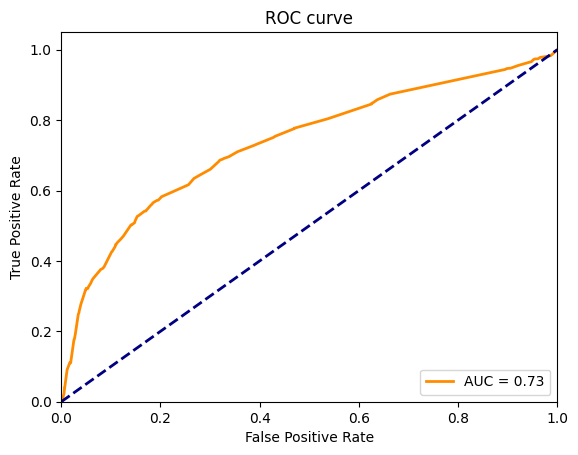

In [ ]:
plot_roccurve(y_test,X_test,clf_pruned_tree)

## k nearest neighbors (k-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Training k nearest neighbors (k-NN)
t0 = time()
print("Fitting the classifier to the training set...")
# If the dataset is small it is recommended small values of neighbours
param_grid = {'n_neighbors': [2,3,4,5], #6,7
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
clf_temp = KNeighborsClassifier()
grid = GridSearchCV(estimator = clf_temp, param_grid = param_grid, cv=10)
grid.fit(X_train, y_train)
clf_KNN = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Fitting the classifier to the training set...
Elapsed time: 366.671s
Best estimator found by grid search:
{'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [ ]:
y_train_pred = clf_KNN.predict(X_train)
y_test_pred = clf_KNN.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.9997713763145862
Test score: 0.7014666666666667


Train confusion matrix


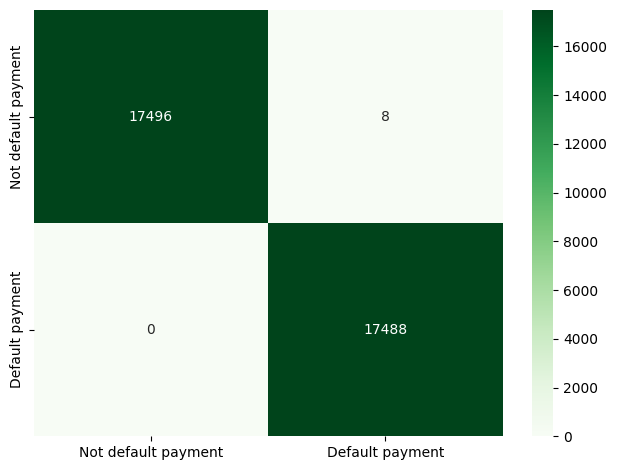

Test confusion matrix


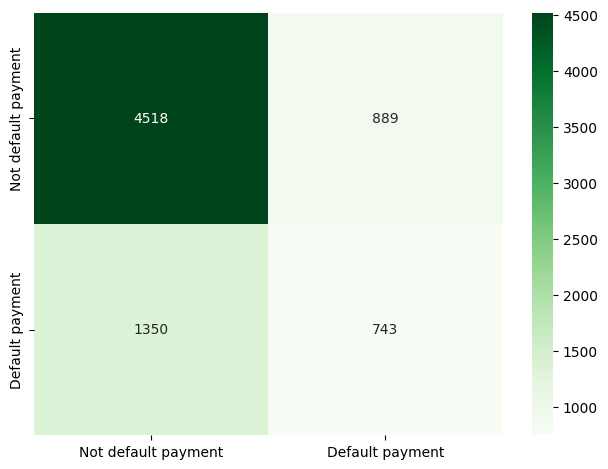

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
                     precision    recall  f1-score   support

Not default payment       1.00      1.00      1.00     17496
    Default payment       1.00      1.00      1.00     17496

           accuracy                           1.00     34992
          macro avg       1.00      1.00      1.00     34992
       weighted avg       1.00      1.00      1.00     34992

Test classification report
                     precision    recall  f1-score   support

Not default payment       0.84      0.77      0.80      5868
    Default payment       0.35      0.46      0.40      1632

           accuracy                           0.70      7500
          macro avg       0.60      0.61      0.60      7500
       weighted avg       0.73      0.70      0.71      7500



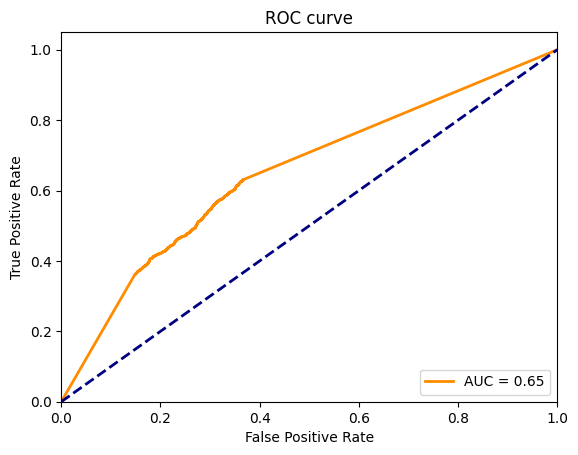

In [ ]:
plot_roccurve(y_test,X_test,clf_KNN)

In [ ]:
# Lets try the parameters without cross-validation:
KNN_noCV = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors= 3, p = 1, weights = 'uniform')
KNN_noCV.fit(X_train, y_train)
y_train_pred = KNN_noCV.predict(X_train)
y_test_pred = KNN_noCV.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.8946044810242341
Test score: 0.6938666666666666


Without cross-validation results do not change.

In [ ]:
np.random.seed(0)
# Training k nearest neighbors (k-NN)
t0 = time()
print("Fitting the classifier to the training set...")
param_grid = {'leaf_size':[2,30,40,50,70,100,1000]}
grid = GridSearchCV(KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors= 5, p = 1, weights = 'uniform'), param_grid, cv=10)
grid.fit(X_train, y_train)
clf_KNN = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Fitting the classifier to the training set...
Elapsed time: 109.533s
Best estimator found by grid search:
{'leaf_size': 2}


Changing the leaf_size parameter typically does not have a significant effect on the results because the dataset is small.

## Support Vector Machine (SVM)

In [ ]:
# from sklearn import svm
from sklearn.svm import SVC

In [ ]:
# Training a Support Vector Machine (SVM)
t0 = time()
print("Fitting the classifier to the training set...")
param_grid={'C': [0.001,0.01,0.1, 1, 100,300,500],    #,700,900,1000#, 1, 1E2, 5E2       
            'degree': [0,1,2,3], #,1,2
            'kernel': ['linear', 'poly', 'rbf'], 
            'gamma' : ['scale','auto'] #[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]
           }
clf_temp = SVC(class_weight='balanced', probability=True,random_state=0)
grid = GridSearchCV(estimator=clf_temp, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
clf_SVM = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

NameError: ignored

In [ ]:
y_train_pred = clf_SVM.predict(X_train)
y_test_pred = clf_SVM.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

In [ ]:
plot_roccurve(y_test,X_test,clf_SVM)

# Ensemble methods

A simple decision tree obtain a good performance of metrics. Next logical step will be using ensemble methods with trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

## Random Forest (RF)

In [ ]:
t0 = time()
print("Fitting the classifier to the training set...")
# 10-fold cv with different parameters
params = {
    'n_estimators': [50, 75, 100, 125, 150, 200]
}
clf_temp = RandomForestClassifier(random_state=0)
grid_RF = GridSearchCV(estimator=clf_temp,param_grid=params,cv=10)
grid_RF.fit(X_train,y_train)
clf_RF = grid_RF.best_estimator_
print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid_RF.best_params_)

In [ ]:
y_train_pred = clf_RF.predict(X_train)
y_test_pred = clf_RF.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

In [ ]:
plot_roccurve(y_test,X_test,clf_RF)

## AdaBoost

In [ ]:
t0 = time()
print("Fitting the classifier to the training set...")
# 10-fold cv with different parameters
params = {
    'n_estimators': [50, 75, 100, 125, 150, 200],
    'estimator' : [None, clf_pruned_tree] #, clf_SVM
    #KNN algorithm does not support sample weighting, required for Adaboost.
}
clf_temp = AdaBoostClassifier(random_state=0)
grid_AB = GridSearchCV(estimator=clf_temp,param_grid=params,cv=10,error_score='raise')
grid_AB.fit(X_train,y_train)
clf_AB = grid_AB.best_estimator_
print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid_AB.best_params_)

In [ ]:
y_train_pred = clf_AB.predict(X_train)
y_test_pred = clf_AB.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

In [ ]:
plot_roccurve(y_test,X_test,clf_AB)

## Gradient Boosting

In [ ]:
t0 = time()
print("Fitting the classifier to the training set...")
# 10-fold cv with different parameters
params = {
    'n_estimators': [15,20,25,50, 75, 100, 125, 150, 200],
    'init' : [None, clf_pruned_tree, KNN_noCV] #, clf_SVM
    # KNN_noCV used instead of clf_KNN because it has less neighbors.
    # Maximum depth of the trees or the number of neighbors in KNN...
    #... should be small values to avoid overfitting in Gradient Boosting.
}
clf_temp = GradientBoostingClassifier(random_state=0)
grid_GB = GridSearchCV(estimator=clf_temp,param_grid=params,cv=10)
grid_GB.fit(X_train,y_train)
clf_GB = grid_GB.best_estimator_
print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid_GB.best_params_)

In [ ]:
y_train_pred = clf_GB.predict(X_train)
y_test_pred = clf_GB.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

In [ ]:
plot_roccurve(y_test,X_test,clf_GB)

Brief discussion:

Source: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

Lot of metrics were required by all of the machine learning models in this notebook. Attendding to the real-world scenario, the most important metric is the precision of the class Default Payment (Yes = 1), followed by the recall of the same class, therefore f1-score would be the best metric that summarizes the two previous ones. **Gradient Boosting has the best metrics for the real-world scenario.**

If you evaluate the quality of models, you should look at the overall accuracy on test and AUC-ROC metrics for new data, i.e. the test data. It is also important to monitor the model's accuracy on the training data to avoid overfitting, which means that the model fits too closely to the training data and cannot generalize well to unseen data. **Better quality model is Gradient Boosting.**

# Bias and variance

Bias and variance are two key components that you must consider when developing any good, accurate machine learning model.

-  Bias creates consistent errors in the ML model, which represents a simpler ML model that is not suitable for a specific requirement.
-  On the other hand, variance creates variance errors that lead to incorrect predictions seeing trends or data points that do not exist.

Generally, the goal is to keep bias as low as possible while introducing acceptable levels of variances. This can be done either by increasing the complexity or increasing the training data set.
Source: https://www.bmc.com/blogs/bias-variance-machine-learning/

Therefore, a simple decision tree will have high bias and low variance. Support Vector Machines (SVM) are generally considered to have a lower bias and a higher variance, as they are able to model complex non-linear decision boundaries. K-Nearest Neighbors (KNN) is considered to have a higher bias and a lower variance, as it does not make any assumptions about the underlying data distribution and can be used for both linear and non-linear problems.

SVM and KNN methods can have higher variance and lower bias compared to a single decision tree. This is because both SVM and KNN models can capture complex relationships between the features and the target variable, which can lead to overfitting and higher variance. However, by tuning the hyperparameters and regularization, we can reduce the variance and improve the bias-variance tradeoff of these models.

Bagging and boosting methods can reduce the variance of high-variance models like decision trees by aggregating the predictions of multiple models. Bagging can reduce the variance without significantly affecting the bias, while boosting can reduce both the bias and variance. However, the effectiveness of these methods depends on the quality of the base models and the hyperparameters used in the ensemble methods.

Both bias and variance of our models (best models found by GridSearhCV) can be calculated in Python using a library called mlxtend with a function called bias_variance_decomp. Also calculates the average expected loss, which is the average error or loss that is expected to be encountered by the model on new or unseen data. It is calculated as the sum of bias and variance. A low expected loss indicates that the model is performing well and generalizing to new data.

In [ ]:
# !pip install -q mlxtend

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
# Display Bias and Variance
def bias_var(clf):
    # Getting Bias and Variance
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    clf, X_train.values, y_train.values, X_test.values, y_test.values, 
    loss='0-1_loss',
    random_seed=0,
    num_rounds=1000)
    # Display Bias and Variance
    print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
    print(f'Average Bias: {round(avg_bias, 4)}')
    print(f'Average Variance: {round(avg_var, 4)}')

Best pruned tree found:

In [ ]:
bias_var(clf_pruned_tree)

Best KNN found:

In [ ]:
bias_var(clf_KNN)

Best SVM found:

In [ ]:
bias_var(clf_SVM)

Best Random Forest found:

In [ ]:
bias_var(clf_RF)

Best AdaBoost found:

In [ ]:
bias_var(clf_AB)

Best Gradient Boosting found:

In [ ]:
bias_var(clf_GB)

**Gradient Boosting has the best bias and variance values.**